In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('file_location/WA_Fn-UseC_-HR-Employee-Attrition.csv')


In [115]:
display(data)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [116]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [117]:
data.shape

(1470, 35)

In [118]:
#small dataset => use ML algorithms instead of deep learning 

In [119]:
#Discover the dataset

In [120]:
data.dtypes.value_counts()


int64     26
object     9
dtype: int64

In [121]:
data1 = data.select_dtypes(include=['object'])
display(data1.head())

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [122]:
for column in data1.columns:
    unique_values = data1[column].unique()
    print(f"values of column '{column}':\n{unique_values}\n")

values of column 'Attrition':
['Yes' 'No']

values of column 'BusinessTravel':
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

values of column 'Department':
['Sales' 'Research & Development' 'Human Resources']

values of column 'EducationField':
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

values of column 'Gender':
['Female' 'Male']

values of column 'JobRole':
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

values of column 'MaritalStatus':
['Single' 'Married' 'Divorced']

values of column 'Over18':
['Y']

values of column 'OverTime':
['Yes' 'No']



In [123]:
# Define mappings for specific columns
column_mappings = {
    'Attrition': {'No': 0, 'Yes': 1},
    'BusinessTravel': {'Travel_Frequently': 2, 'Travel_Rarely': 1, 'Non-Travel': 0},
    'Department': {'Research & Development': 3, 'Sales': 2, 'Human Resources': 1},
    'EducationField': {
        'Life Sciences': 1, 'Other': 6, 'Medical': 2, 'Marketing': 3,
        'Technical Degree': 4, 'Human Resources': 5
    },
    'Gender': {'Male': 0, 'Female': 1},
    'JobRole': {
        'Research Scientist': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3,
        'Healthcare Representative': 4, 'Manager': 5, 'Sales Representative': 6,
        'Research Director': 7, 'Sales Executive': 8, 'Human Resources': 9
    },
    'MaritalStatus': {'Married': 2, 'Single': 1, 'Divorced': 3},
    'Over18': {'Y': 1},
    'OverTime': {'No': 0, 'Yes': 1}
}

In [124]:
# Use the replace method with the defined mappings for specific columns
data.replace(column_mappings, inplace=True)

# Print the updated DataFrame
display(data.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,3,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,3,2,2,6,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,3,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,3,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


In [125]:
# Split data into features and target.  Attrition is our target

In [126]:
data_y= data["Attrition"]
data_x = data.drop("Attrition", axis=1)

In [127]:
data_y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [128]:
data_x = data.drop("Attrition", axis=1)
data_x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,2,279,3,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,3,2,2,6,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,2,1392,3,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,1,591,3,2,1,2,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2,884,3,23,2,2,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,1,613,3,6,1,2,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,1,155,3,4,3,1,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,2,1023,2,2,3,2,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [129]:
#we have some columns that contains only one unique value (e.g., all values are 1), it is a good choice to drop these columns.

In [130]:
# Capture the list of columns to be dropped
dropped_columns = data_x.columns[data_x.nunique() == 1]

# Print the list of dropped columns
print("Dropped Columns:", dropped_columns)

Dropped Columns: Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')


In [131]:
# Drop the constant columns and update the DataFrame
data_x = data_x.loc[:, data.nunique() > 1]

In [132]:
from scipy.stats import skew

In [133]:
def determine_scaling_method(column):
    # Calculate skewness of the feature
    skewness = skew(column)

    # Check skewness and range of values
    if abs(skewness) > 1.0:
        return "Standardization"  # Feature is significantly skewed
    elif (column.max() - column.min()) > 1:
        return "Normalization"  # Feature has a wide range
    else:
        return "No Scaling Required"

In [134]:
# Loop through each column and determine scaling method
for column in data_x.columns:
    scaling_method = determine_scaling_method(data_x[column])
    print(f"Feature '{column}' should use: {scaling_method}")

Feature 'Age' should use: Normalization
Feature 'BusinessTravel' should use: Normalization
Feature 'DailyRate' should use: Normalization
Feature 'Department' should use: Standardization
Feature 'DistanceFromHome' should use: Normalization
Feature 'Education' should use: Normalization
Feature 'EducationField' should use: Standardization
Feature 'EmployeeNumber' should use: Normalization
Feature 'EnvironmentSatisfaction' should use: Normalization
Feature 'Gender' should use: No Scaling Required
Feature 'HourlyRate' should use: Normalization
Feature 'JobInvolvement' should use: Normalization
Feature 'JobLevel' should use: Standardization
Feature 'JobRole' should use: Normalization
Feature 'JobSatisfaction' should use: Normalization
Feature 'MaritalStatus' should use: Normalization
Feature 'MonthlyIncome' should use: Standardization
Feature 'MonthlyRate' should use: Normalization
Feature 'NumCompaniesWorked' should use: Standardization
Feature 'OverTime' should use: No Scaling Required
Fea

In [135]:
def scale_feature(column):
    # Calculate skewness of the feature
    skewness = skew(column)

    # Check skewness and range of values
    if abs(skewness) > 1.0:
        # Apply standardization
        scaler = StandardScaler()
        return scaler.fit_transform(column.values.reshape(-1, 1))
    elif (column.max() - column.min()) > 1:
        # Apply normalization
        scaler = MinMaxScaler()
        return scaler.fit_transform(column.values.reshape(-1, 1))
    else:
        # No scaling required
        return column.values

In [136]:
for column in data_x.columns:
    data_x[column] = scale_feature(data_x[column])

C:\Users\hanen\AppData\Local\Temp\ipykernel_20136\2018502856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x[column] = scale_feature(data_x[column])
C:\Users\hanen\AppData\Local\Temp\ipykernel_20136\2018502856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x[column] = scale_feature(data_x[column])
C:\Users\hanen\AppData\Local\Temp\ipykernel_20136\2018502856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [137]:
# Display the DataFrame with scaled columns
display(data_x.head())

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,0.5,0.715820,-1.074178,0.000000,0.25,-0.833994,0.000000,0.333333,1,...,-0.426230,0.000000,0.000000,-0.421642,0.0,0.000000,-0.164613,0.222222,-0.679146,0.294118
1,0.738095,1.0,0.126700,0.684220,0.250000,0.00,-0.833994,0.000484,0.666667,0,...,2.346151,1.000000,0.333333,-0.164511,0.5,0.666667,0.488508,0.388889,-0.368715,0.411765
2,0.452381,0.5,0.909807,0.684220,0.035714,0.25,2.780306,0.001451,1.000000,0,...,-0.426230,0.333333,0.000000,-0.550208,0.5,0.666667,-1.144294,0.000000,-0.679146,0.000000
3,0.357143,1.0,0.923407,0.684220,0.071429,0.75,-0.833994,0.001935,1.000000,1,...,-0.426230,0.666667,0.000000,-0.421642,0.5,0.666667,0.161947,0.388889,0.252146,0.000000
4,0.214286,0.5,0.350036,0.684220,0.035714,0.00,-0.111134,0.002903,0.000000,0,...,-0.426230,1.000000,0.333333,-0.678774,0.5,0.666667,-0.817734,0.111111,-0.058285,0.117647


In [138]:
data_x.to_csv('scaled_x_data.csv', index=False)
data_y.to_csv('y_data.csv', index=False)


In [ ]:
#####################################

<function matplotlib.pyplot.show(close=None, block=None)>

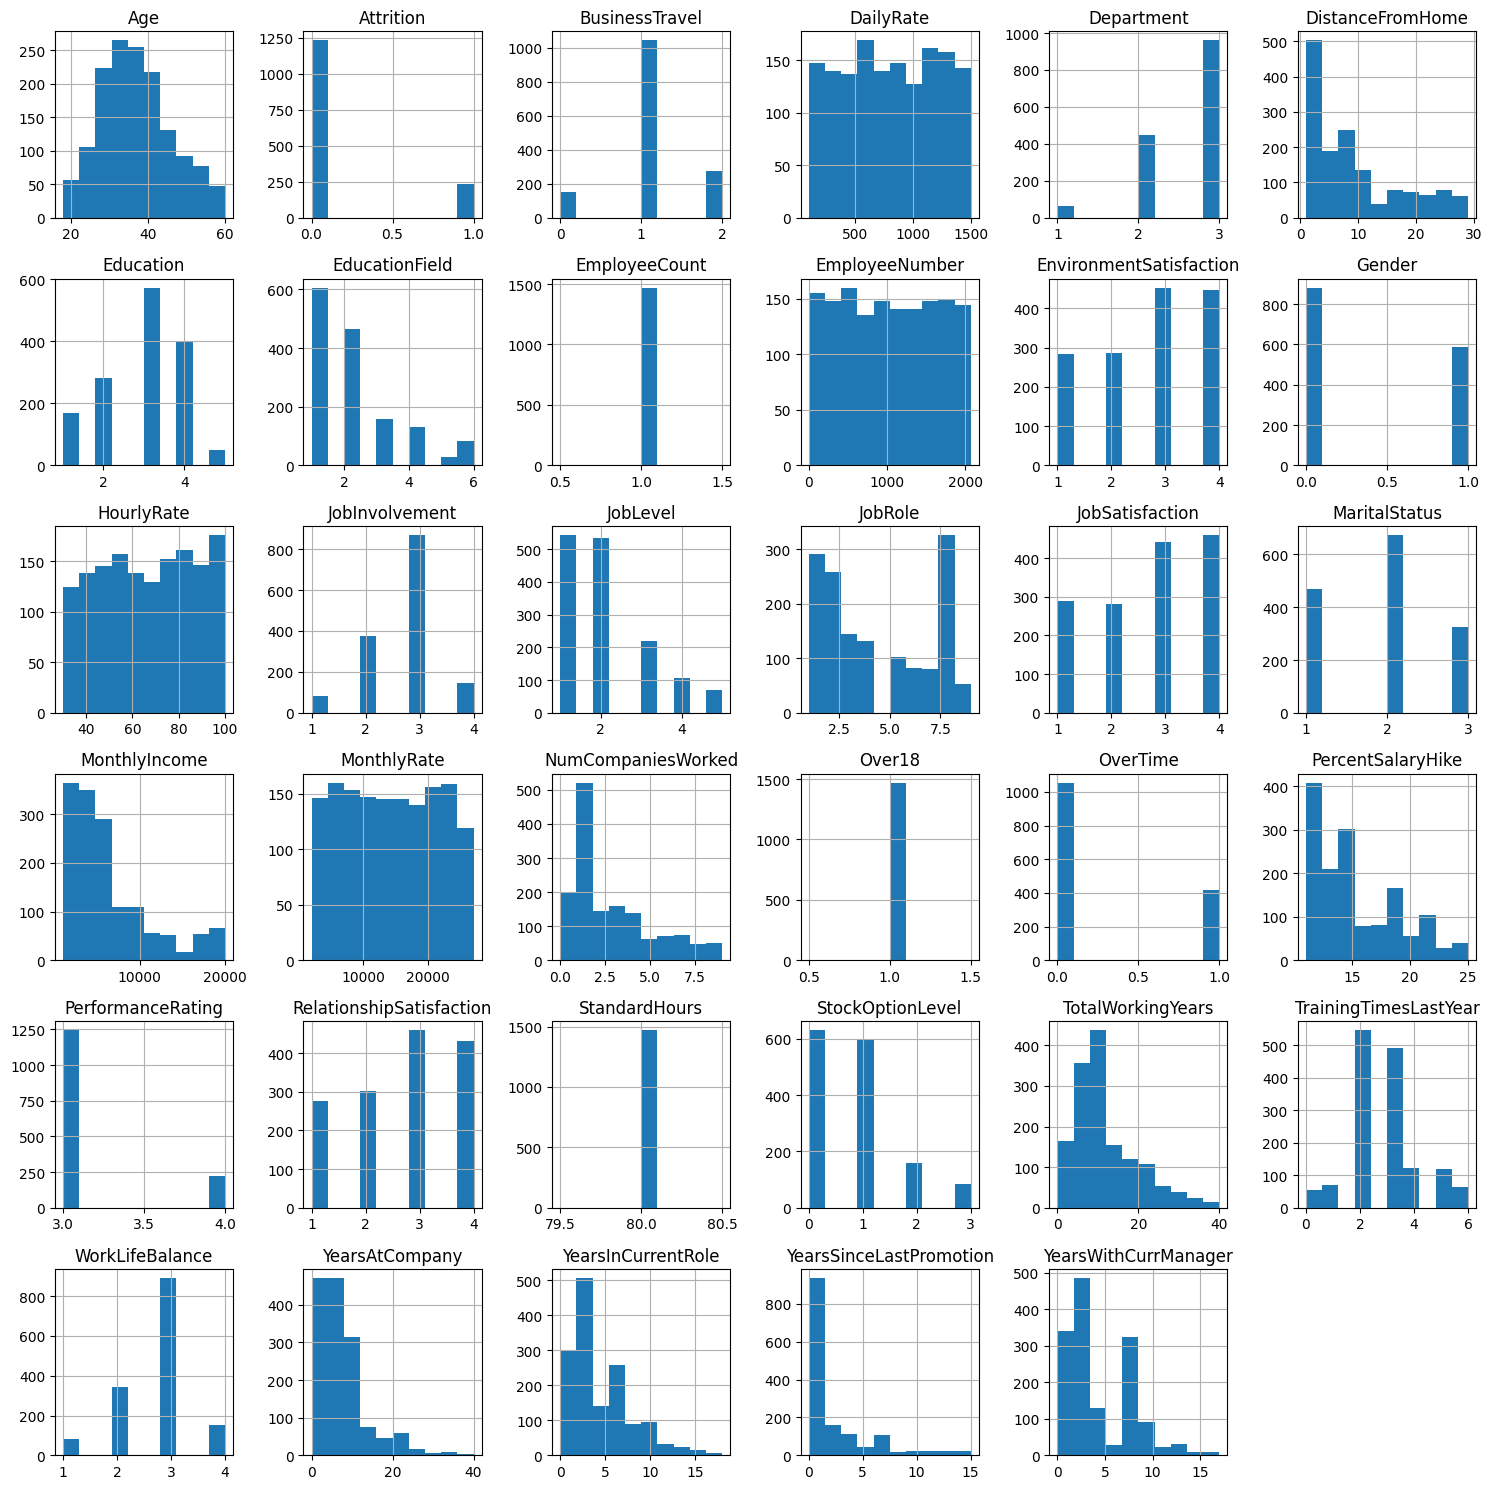

In [111]:
data.hist(figsize=(15,15))
plt.tight_layout()
plt.show

In [15]:
data_attrition_yes=data[data["Attrition"]=="Yes"]

<function matplotlib.pyplot.show(close=None, block=None)>

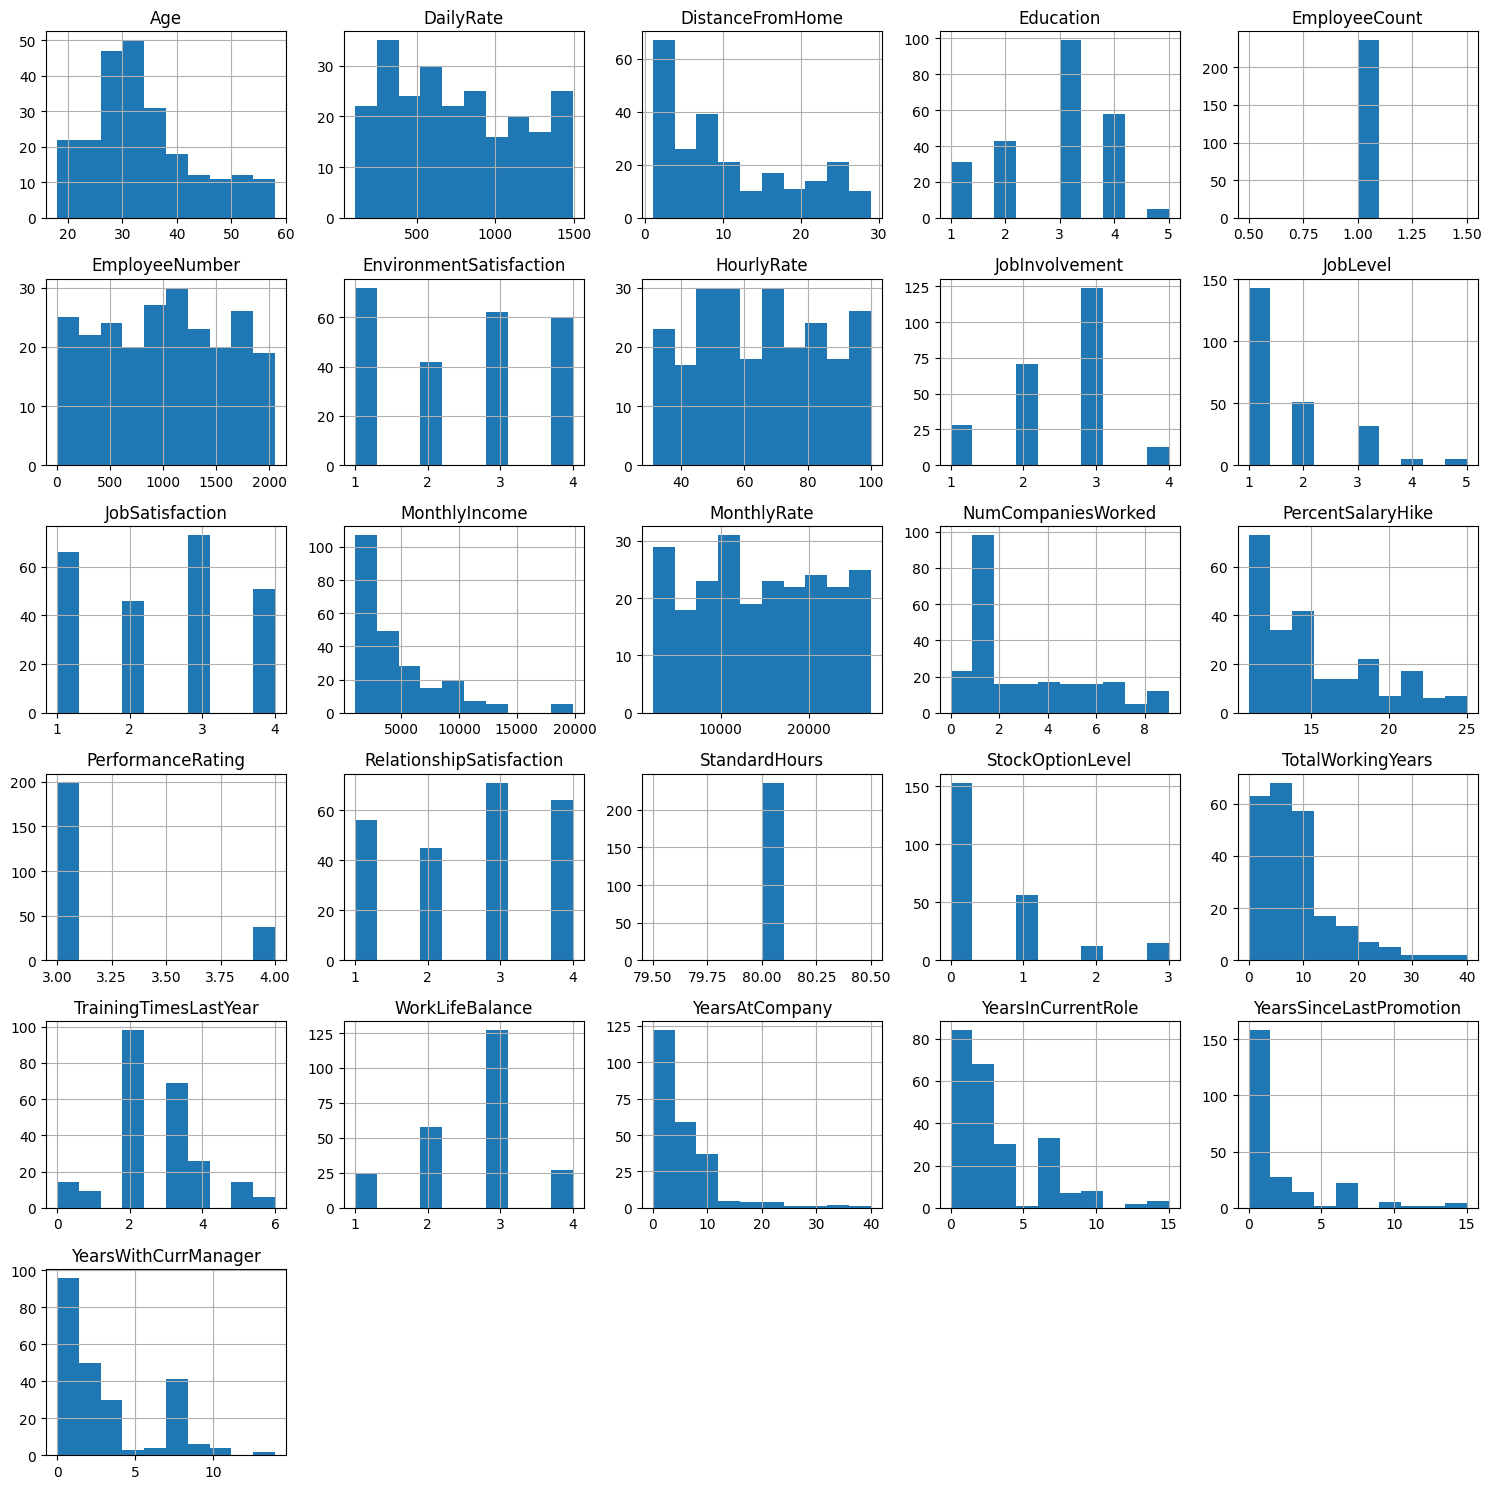

In [17]:
data_attrition_yes.hist(figsize=(15,15))
plt.tight_layout()
plt.show